In [18]:
# Design a one layer NN with two inputs and two outputs
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [20]:
# define forward pass
def forward_pass(inputs, weights, biases):
    # Calculate the weighted sum of inputs
    weighted_sum = np.dot(weights, inputs) + biases
    # Apply the sigmoid activation function
    output = sigmoid(weighted_sum)
    return output

In [21]:
# define the error function
def mean_squared_error(targets, outputs):
    return 0.5 * np.mean((targets - outputs)**2)

In [22]:
# Define the input and output
X = np.array([[0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
              [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]])
Y = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

# Initialize the NN
input_size = 2
output_size = 2
learning_rate = 0.1

# Initialize the weights and biases
weights = np.random.randn(output_size, input_size)
biases = np.zeros((output_size, 1))

In [23]:
weights

array([[0.43119025, 1.36141238],
       [1.23998988, 0.37243009]])

In [24]:
biases

array([[0.],
       [0.]])

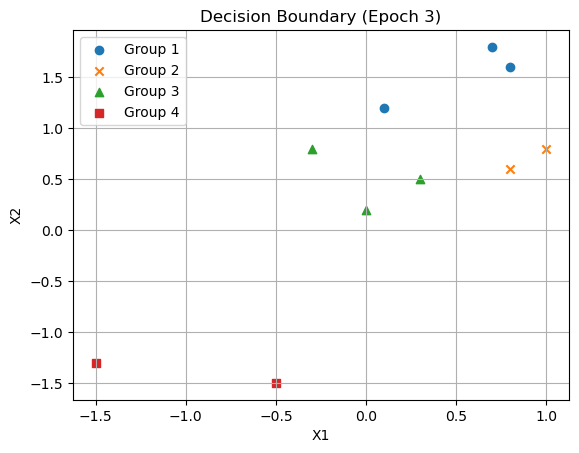

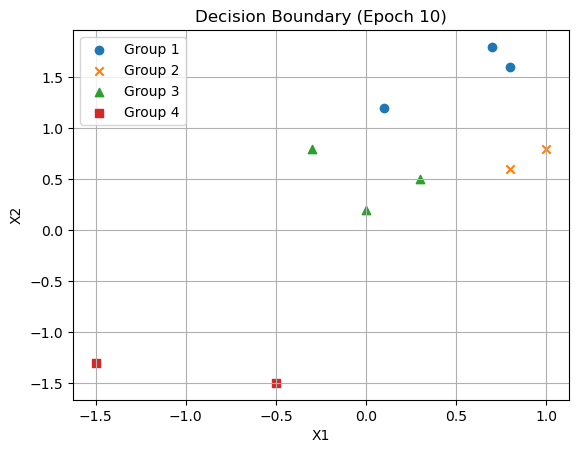

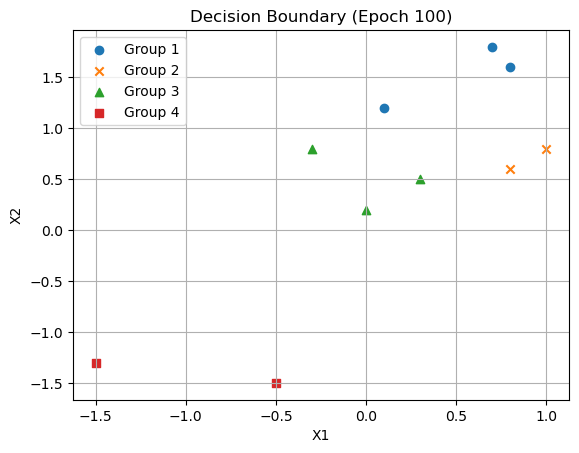

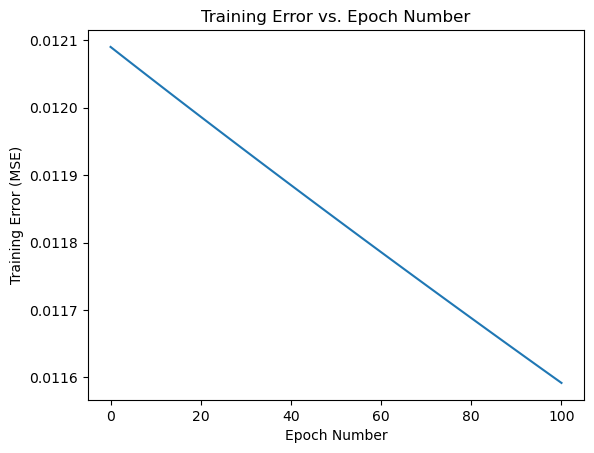

In [34]:
# training parameters
num_epochs = 101
errors = []

# training loop
for epoch in range(num_epochs):
    total_error = 0
    for i in range(X.shape[1]):
        inputs = X[:, i].reshape(-1,1)
        targets = Y[:, i].reshape(-1,1)
        output = forward_pass(inputs, weights, biases)
        
        # calculate the error
        error = mean_squared_error(targets, output)
        total_error += error
        
        # backpropagation
        error_g = output - targets
        error_gradient = error_g * sigmoid_derivative(output)
        weights_gradient = np.dot(error_gradient, inputs.T)
        biases_gradient = error_gradient
        
        # update weights and biases
        weights -= learning_rate * weights_gradient
        biases -= learning_rate * biases_gradient
        
    # store the mean error for this epoch
    errors.append(total_error / X.shape[1])
    
    # Plot decision boundary and data points after 3, 10, and 100 epochs
    if epoch in [3, 10, 100]:
        # Plot decision boundary and data points
        plt.figure()
        plt.title(f'Decision Boundary (Epoch {epoch})')
        
        # Plot decision boundary
        plt.scatter(X[0, :3], X[1, :3], label='Group 1', marker='o')
        plt.scatter(X[0, 3:5], X[1, 3:5], label='Group 2', marker='x')
        plt.scatter(X[0, 5:8], X[1, 5:8], label='Group 3', marker='^')
        plt.scatter(X[0, 8:], X[1, 8:], label='Group 4', marker='s')

        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.grid()

        plt.show()

# Plot training error vs epoch number
plt.figure()
plt.plot(range(num_epochs), errors)
plt.xlabel('Epoch Number')
plt.ylabel('Training Error (MSE)')
plt.title('Training Error vs. Epoch Number')
plt.show()
        

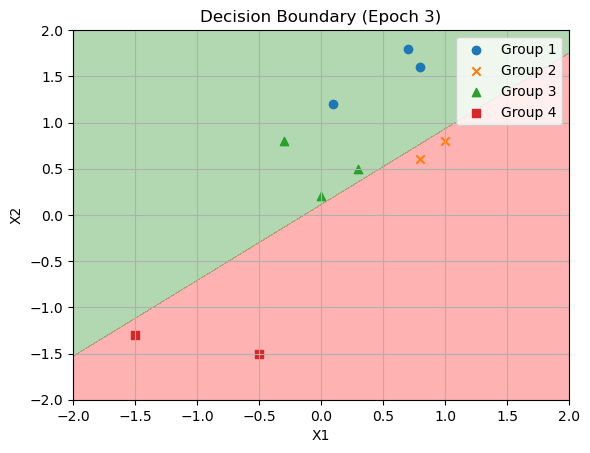

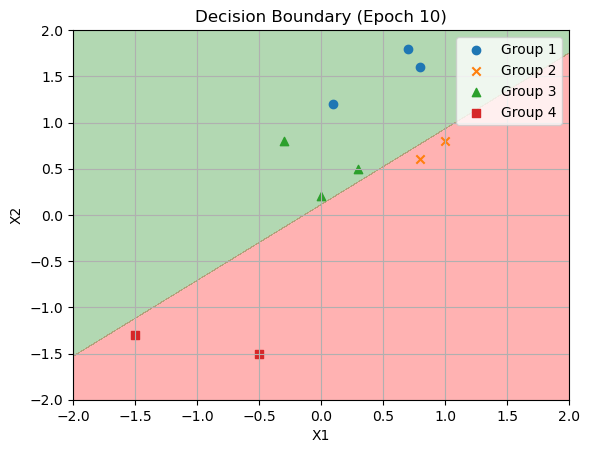

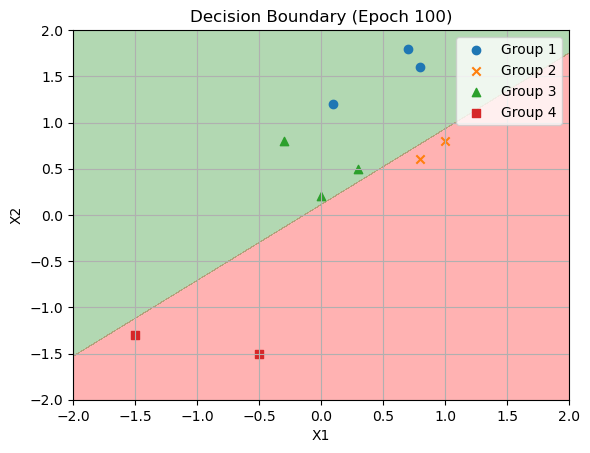

In [35]:
# After the training loop
for epoch in [3, 10, 100]:
    plt.figure()
    plt.title(f'Decision Boundary (Epoch {epoch})')

    # Create a grid of points to visualize the decision boundary
    x_grid, y_grid = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    grid_inputs = np.vstack((x_grid.ravel(), y_grid.ravel()))

    # Calculate the network's output for the grid points
    grid_outputs = np.zeros(grid_inputs.shape[1])
    for i in range(grid_inputs.shape[1]):
        grid_input = grid_inputs[:, i].reshape(-1, 1)
        grid_output = forward_pass(grid_input, weights, biases)
        grid_outputs[i] = grid_output[0]  # Use the output for the first class

    # Reshape the grid output to match the grid shape
    grid_outputs = grid_outputs.reshape(x_grid.shape)

    # Plot the decision boundary
    plt.contourf(x_grid, y_grid, grid_outputs, levels=[0, 0.5, 1], colors=['r', 'g'], alpha=0.3)

    # Plot data points
    plt.scatter(X[0, :3], X[1, :3], label='Group 1', marker='o')
    plt.scatter(X[0, 3:5], X[1, 3:5], label='Group 2', marker='x')
    plt.scatter(X[0, 5:8], X[1, 5:8], label='Group 3', marker='^')
    plt.scatter(X[0, 8:], X[1, 8:], label='Group 4', marker='s')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid()

    plt.show()
